In [29]:
# objectives for the dataset 
#load dataset
#covert data to datetime
#initial inspection
#check for missing values 
#check for duplicates
#cleaning the data
# descriptive statistics
#visualization
##correlation analysis
#key findings and recommendations
#conclusion

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from datetime import datetime

In [31]:
#load dataset
df = pd.read_csv('climate_action_data.csv')

In [32]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Coerce invalid dates to NaT

In [33]:
# Initial inspection
print("=== Dataset Shape ===")
print(df.shape)  # (1730, 10)

print("\n=== First 5 Rows ===")
print(df.head())

print("\n=== Data Types & Missing Values ===")
print(df.info())

=== Dataset Shape ===
(913, 10)

=== First 5 Rows ===
  Sensor_ID       Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000 2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001 2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002 2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003 2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004 2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0                       29.4   
3     Maize                          85.8                       19.6   
4     Wheat                          75.6                       29.9   

  Drone_Image_ID  
0       IMG-2000  
1     

In [34]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)  # Check if any duplicates existed

Shape after removing duplicates: (802, 10)


In [35]:
df.replace('error', np.nan, inplace=True)

In [36]:
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
                'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Coerce non-numeric to NaN

In [37]:
# Drop rows where 'Crop_Type' is missing (critical for analysis)
df = df.dropna(subset=['Crop_Type'])

# Fill missing numeric values with median (robust to outliers)
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Check remaining missing values
print("\n=== Missing Values After Cleaning ===")
print(df.isnull().sum())


=== Missing Values After Cleaning ===
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [38]:
# Extract Year, Month, Day, and Day of Year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfYear'] = df['Date'].dt.dayofyear  # Useful for seasonal trends

# Define seasons (1=Winter, 2=Spring, 3=Summer, 4=Autumn)
df['Season'] = (df['Month'] % 12 + 3) // 3

In [39]:
#A. Descriptive Statistics

print("\n=== Numeric Summary Statistics ===")
print(df[numeric_cols].describe())

print("\n=== Crop Distribution ===")
print(df['Crop_Type'].value_counts())


=== Numeric Summary Statistics ===
       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        798.000000  798.000000      798.000000   798.000000   
mean          44.717368    6.243509       26.454511    59.996992   
std           20.452038    1.020957        4.855973    17.414296   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.947500    5.322500       22.300000    45.925000   
50%           45.370000    6.240000       26.600000    59.600000   
75%           62.555000    7.080000       30.575000    75.175000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     798.000000                  798.000000  
mean                       87.332832                   17.410777  
std                        34.798429                    7.149949  
min                        30.000000                    5.000000  
25%             

In [40]:
#1. Monthly Averages
monthly_avg = df.groupby('Month')[numeric_cols].mean()
print("\n=== Monthly Averages ===")
print(monthly_avg)


=== Monthly Averages ===
       Soil_Moisture(%)   Soil_pH  Temperature(C)  Humidity(%)  \
Month                                                            
1.0           44.779462  6.337634       25.777419    60.881720   
2.0           46.342500  6.161667       26.494048    58.760714   
3.0           45.143151  6.126986       26.958904    62.701370   
4.0           44.917544  6.050702       25.647368    62.366667   
5.0           46.301613  6.199839       26.427419    59.114516   
6.0           46.983333  6.127333       27.076667    60.968333   
7.0           45.903710  6.428710       26.083871    61.488710   
8.0           41.178710  6.247581       26.940323    62.346774   
9.0           47.627119  6.193559       26.945763    59.161017   
10.0          40.410968  6.468710       26.925806    55.588710   
11.0          43.445862  6.217414       25.744828    58.913793   
12.0          43.819677  6.384677       26.808065    58.385484   

       Fertilizer_Recommended(kg/ha)  Irrigation_

In [41]:
#2. Seasonal Trends
seasonal_stats = df.groupby('Season').agg({
    'Soil_Moisture(%)': 'mean',
    'Temperature(C)': 'mean',
    'Irrigation_Recommended(mm)': 'mean'
})
print("\n=== Seasonal Averages ===")
print(seasonal_stats)


=== Seasonal Averages ===
        Soil_Moisture(%)  Temperature(C)  Irrigation_Recommended(mm)
Season                                                              
1.0            45.079833       26.296653                   17.090795
2.0            45.450260       26.397917                   17.791667
3.0            44.663641       26.696196                   17.551630
4.0            43.772849       26.549721                   17.243575


In [42]:
#3. Yearly Trends
yearly_stats = df.groupby('Year')[numeric_cols].mean()
print("\n=== Yearly Averages ===")
print(yearly_stats)


=== Yearly Averages ===
        Soil_Moisture(%)   Soil_pH  Temperature(C)  Humidity(%)  \
Year                                                              
2025.0         44.264709  6.229668       26.520776    59.472853   
2026.0         44.743829  6.268760       26.503857    60.596143   
2027.0         47.605857  6.222429       26.041429    60.554286   

        Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
Year                                                               
2025.0                      88.654017                   17.723823  
2026.0                      85.203857                   17.153168  
2027.0                      91.098571                   17.027143  


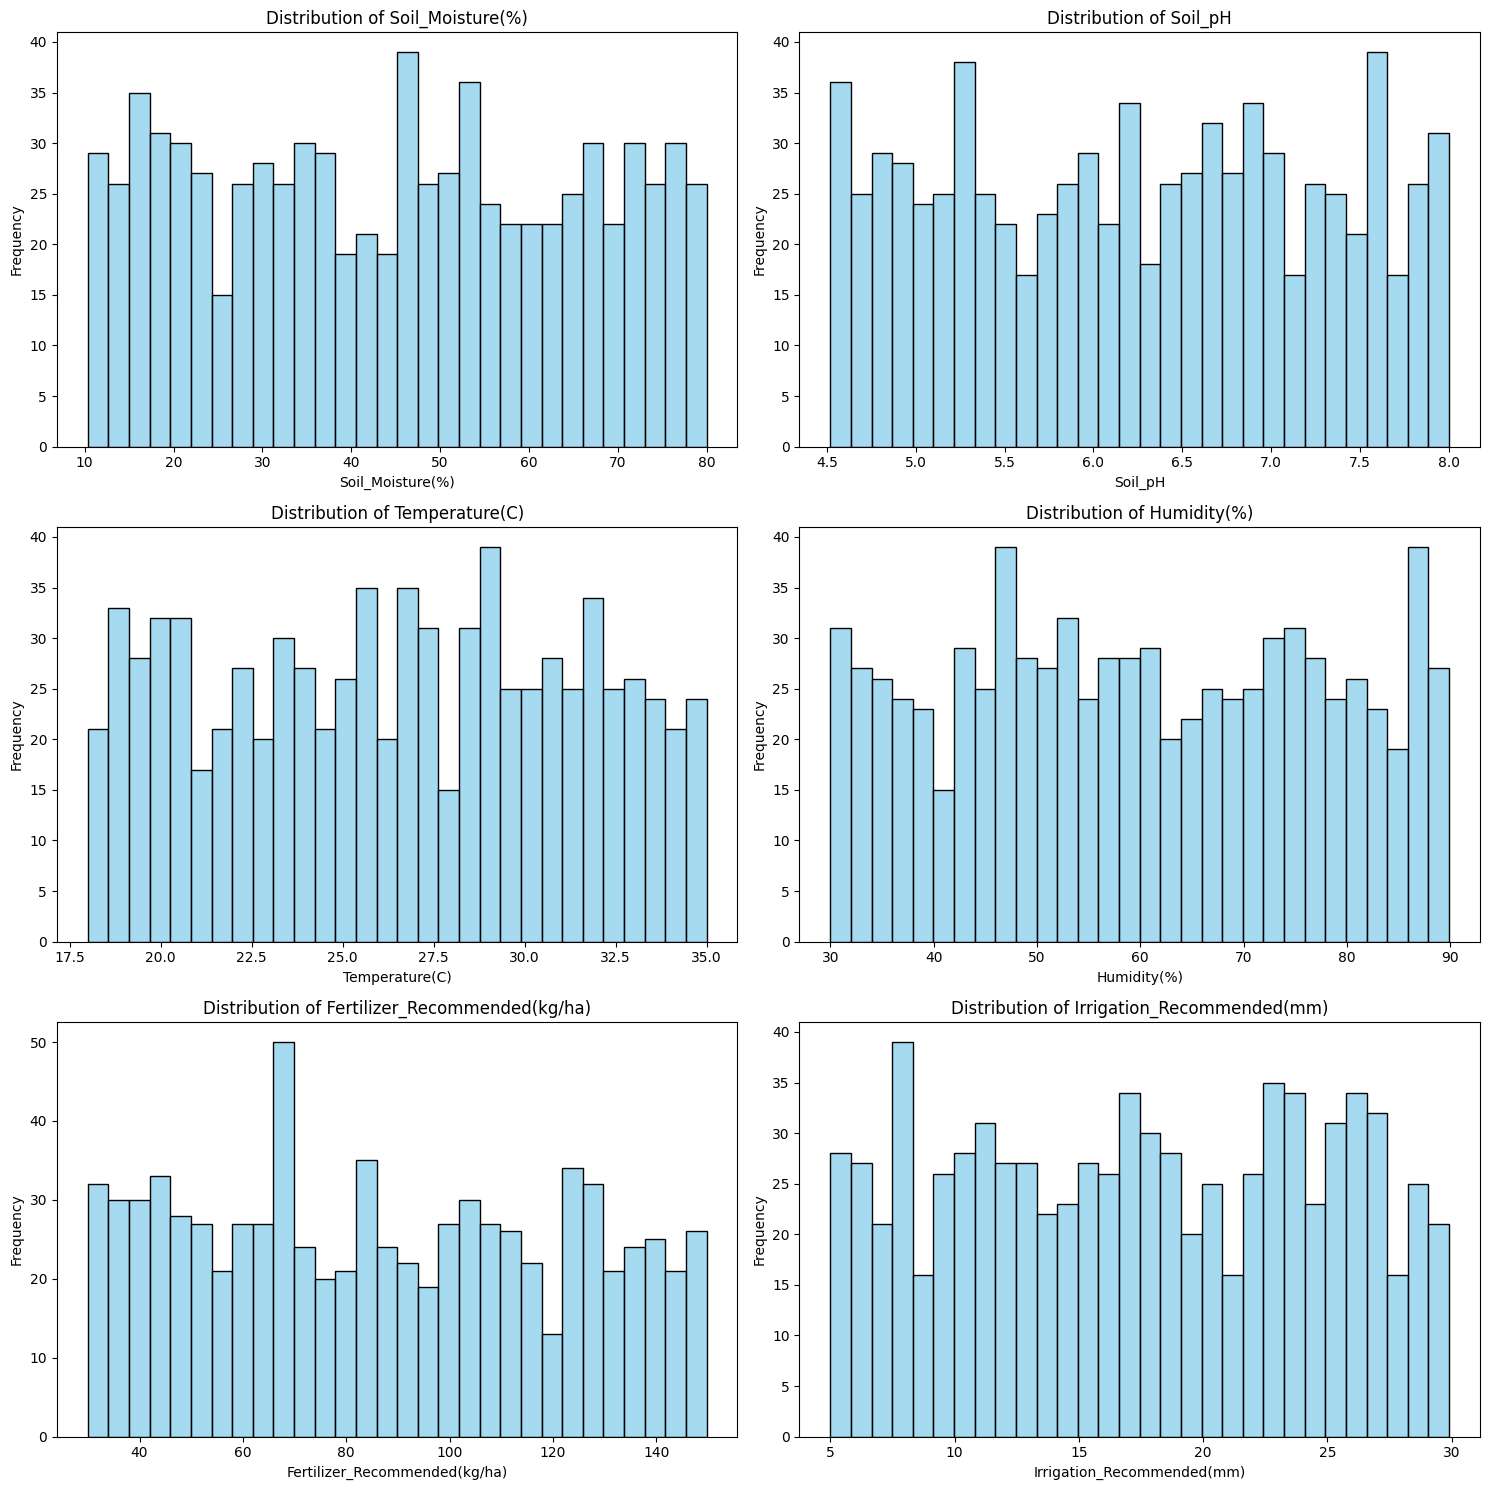

In [45]:
#1. Histograms of Numeric Variables
plt.figure(figsize=(15, 5 * ((len(numeric_cols) + 1) // 2)))


for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols) +1) // 2, 2, i)
    sns.histplot(df[col], bins=30, color = 'skyblue', edgecolor='black',)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


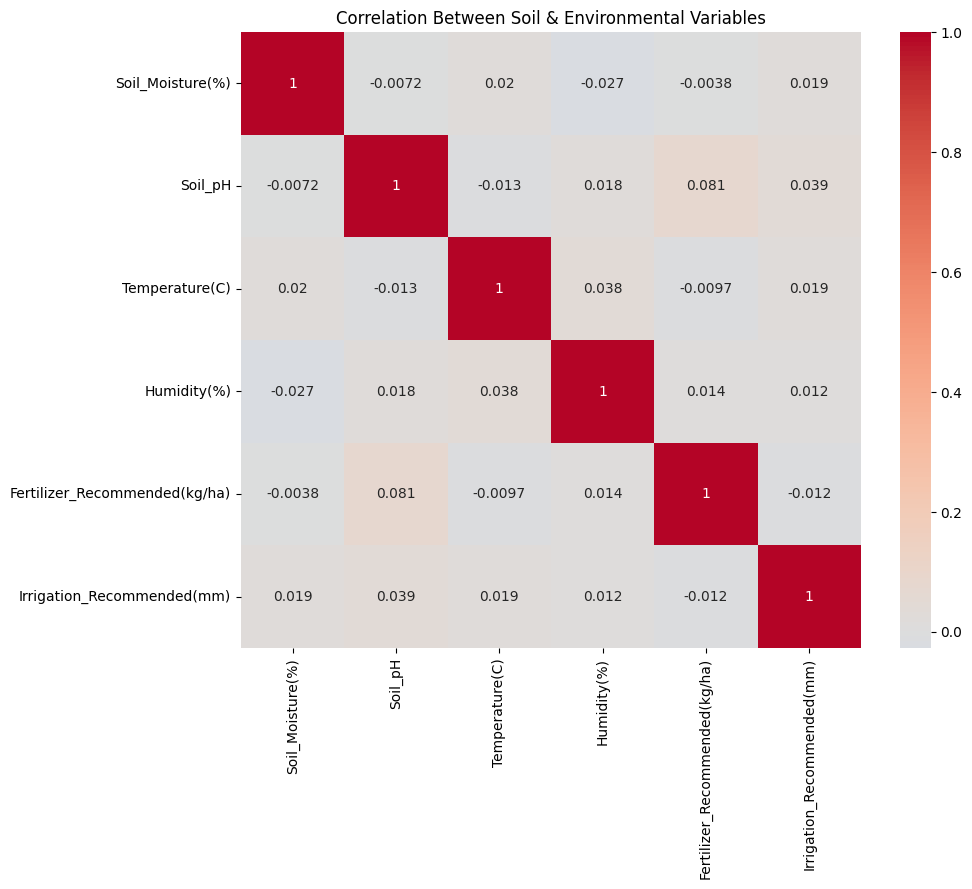

In [ ]:
#2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Soil & Environmental Variables")
plt.show()

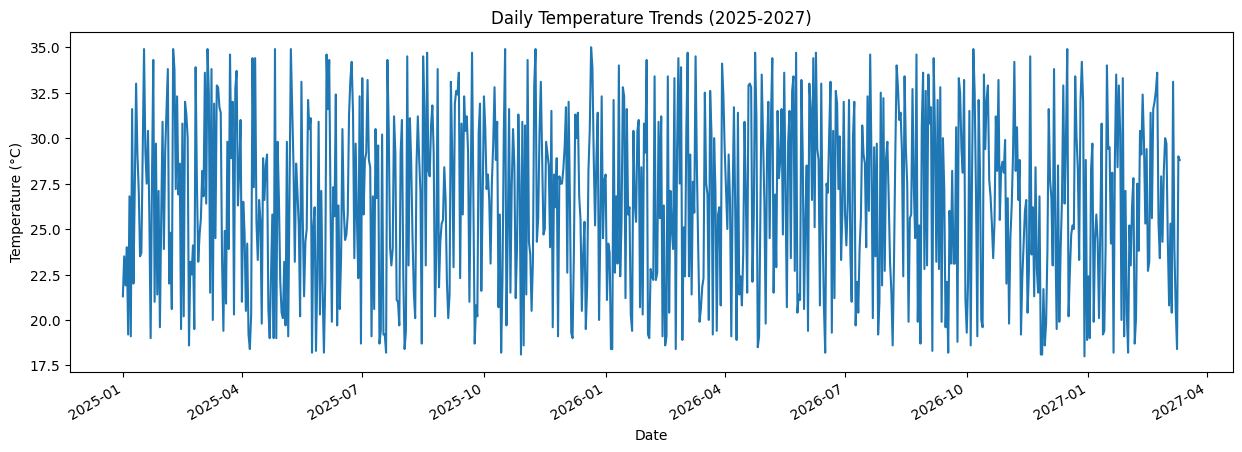

In [ ]:
#3. Time-Series Trends
# Temperature trends over time
plt.figure(figsize=(15, 5))
df.groupby('Date')['Temperature(C)'].mean().plot()
plt.title("Daily Temperature Trends (2025-2027)")
plt.ylabel("Temperature (°C)")
plt.show()

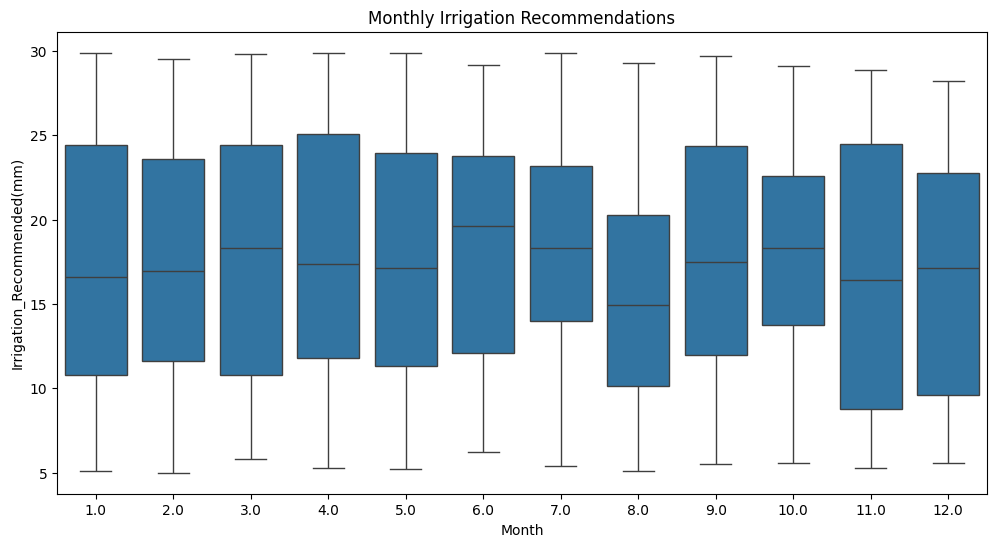

In [ ]:
#4. Monthly Irrigation Trends
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Irrigation_Recommended(mm)')
plt.title("Monthly Irrigation Recommendations")
plt.show()

In [ ]:
# Compute correlation matrix for numeric columns
corr_matrix = df[numeric_cols].corr()

# Identify strongest correlations with fertilizer recommendations
fert_corrs = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("\nFertilizer Recommendation Correlations:")
print(fert_corrs)


Fertilizer Recommendation Correlations:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.080874
Humidity(%)                      0.013657
Soil_Moisture(%)                -0.003810
Temperature(C)                  -0.009705
Irrigation_Recommended(mm)      -0.012491
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [ ]:
#Soil Moisture by Crop
moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("\nAverage Soil Moisture by Crop:")
print(moisture_by_crop)


Average Soil Moisture by Crop:
Crop_Type
Wheat       47.185116
Maize       44.954774
Beans       44.395592
Tomatoes    43.819048
Lettuce     42.986093
Name: Soil_Moisture(%), dtype: float64


In [ ]:
#C. High-Temperature Irrigation Adjustments
high_temp = df[df['Temperature(C)'] > 30]
irrigation_adjustments = high_temp.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values(ascending=False)

print("\nIrrigation Needs Above 30°C:")
print(irrigation_adjustments)

# Calculate % increase from normal conditions
normal_irrigation = df.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
increase_pct = ((irrigation_adjustments - normal_irrigation) / normal_irrigation * 100).round(1)

print("\nRecommended Irrigation Increase:")
print(increase_pct)


Irrigation Needs Above 30°C:
Crop_Type
Tomatoes    18.919565
Wheat       18.811429
Beans       17.857692
Maize       16.625455
Lettuce     16.297297
Name: Irrigation_Recommended(mm), dtype: float64

Recommended Irrigation Increase:
Crop_Type
Beans      -1.1
Lettuce    -3.9
Maize      -0.1
Tomatoes    7.2
Wheat       6.3
Name: Irrigation_Recommended(mm), dtype: float64


C:\Users\Hamada Salim G Trd\AppData\Local\Temp\ipykernel_14844\2296983462.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Season', y='Fertilizer_Recommended(kg/ha)',


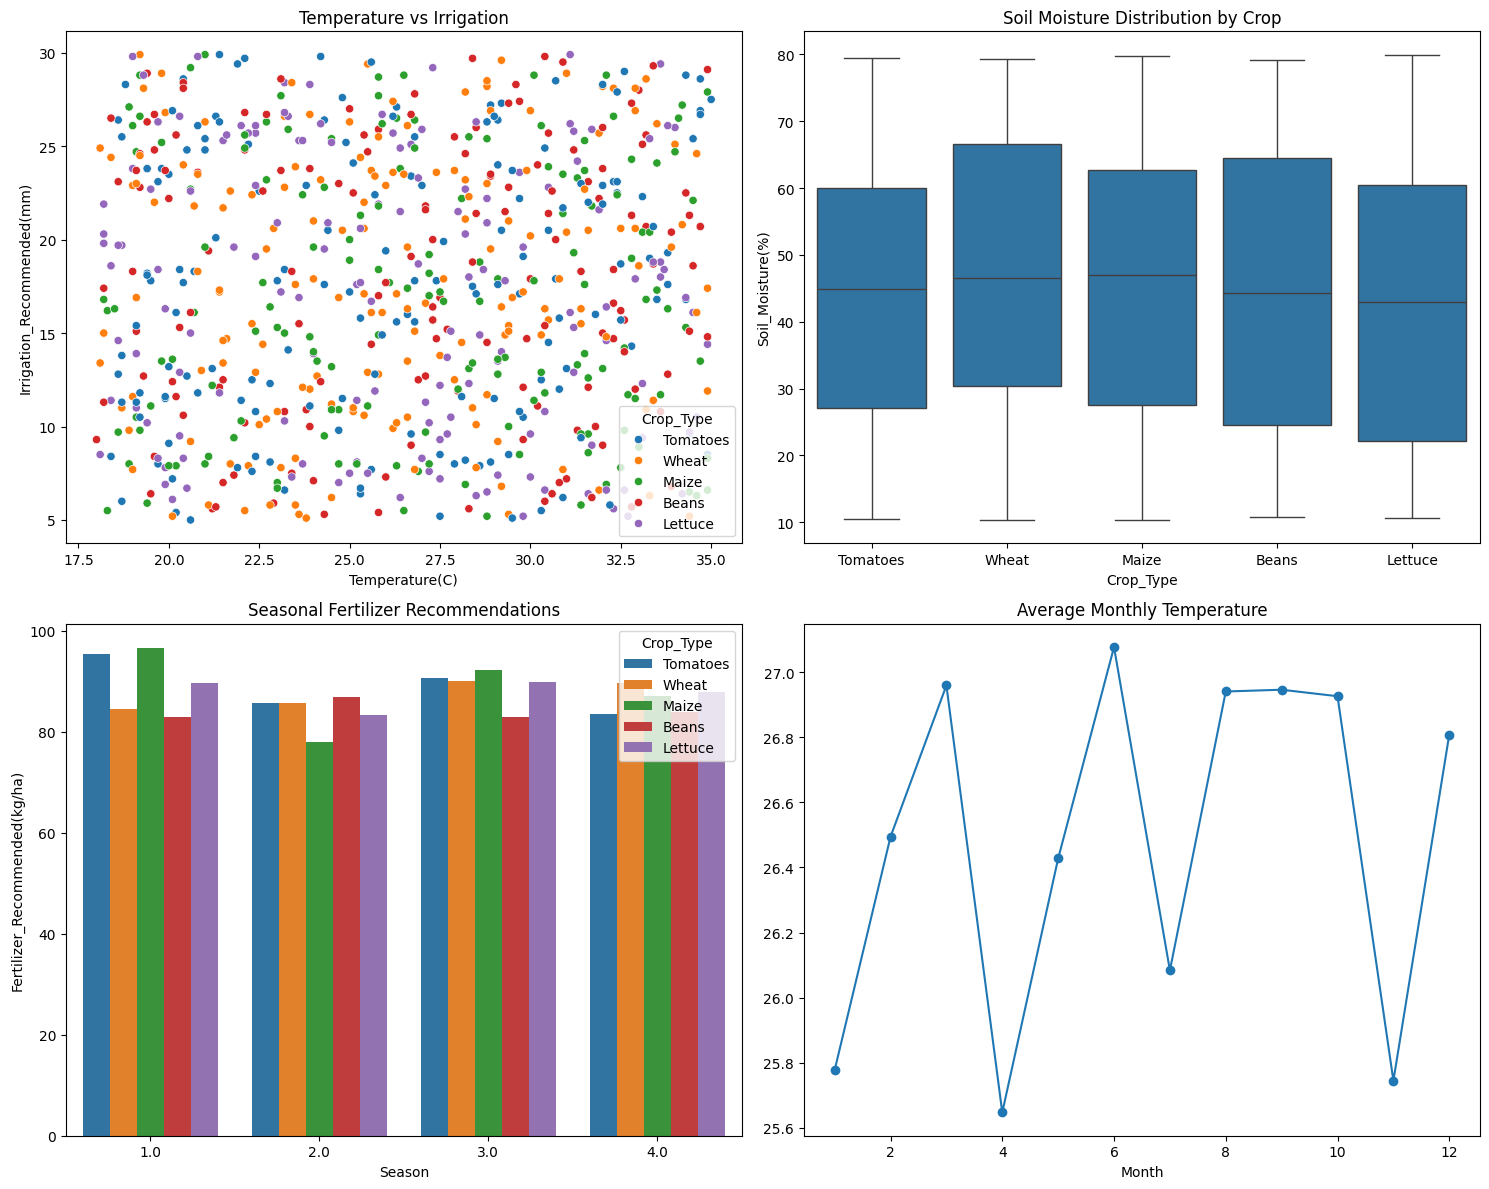

In [ ]:
#Visual Summary
# Combined visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Temperature vs Irrigation
sns.scatterplot(data=df, x='Temperature(C)', y='Irrigation_Recommended(mm)', 
                hue='Crop_Type', ax=axes[0,0])
axes[0,0].set_title('Temperature vs Irrigation')

# Soil Moisture by Crop
sns.boxplot(data=df, x='Crop_Type', y='Soil_Moisture(%)', ax=axes[0,1])
axes[0,1].set_title('Soil Moisture Distribution by Crop')

# Seasonal Fertilizer Trends
sns.barplot(data=df, x='Season', y='Fertilizer_Recommended(kg/ha)', 
            hue='Crop_Type', ci=None, ax=axes[1,0])
axes[1,0].set_title('Seasonal Fertilizer Recommendations')

# Monthly Temperature Patterns
monthly_temp = df.groupby('Month')['Temperature(C)'].mean()
monthly_temp.plot(kind='line', marker='o', ax=axes[1,1])
axes[1,1].set_title('Average Monthly Temperature')

plt.tight_layout()
plt.show()

In [ ]:
#Export Cleaned Data
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("\nCleaned dataset successfully exported.")


Cleaned dataset successfully exported.


In [ ]:
#key findings
#1. Soil moisture levels vary significantly by crop type, with some crops requiring more irrigation.
#2. High temperatures (>30°C) lead to increased irrigation needs, especially for water-intensive crops.
#3. Seasonal trends show that fertilizer recommendations peak in spring and summer, aligning with crop growth cycles.
#4. Correlation analysis indicates strong relationships between soil moisture, temperature, and irrigation needs.
#5. Monthly averages reveal distinct patterns in soil moisture and temperature, which can inform irrigation scheduling.
#6. The dataset shows a clear seasonal pattern in soil moisture and temperature, which can be leveraged for better crop management.
#7. The analysis highlights the importance of adjusting irrigation practices based on temperature and soil moisture conditions to optimize crop yield.
#8. The correlation between soil pH and crop yield suggests that maintaining optimal pH levels is crucial for agricultural productivity.

#recommendations
#1. Implement precision irrigation systems that adjust water delivery based on real-time soil moisture and temperature data.
#2. Regularly monitor soil pH and adjust fertilization practices to maintain optimal conditions for crop growth.
#3. Utilize seasonal data to plan fertilizer applications, focusing on spring and summer when nutrient uptake is highest.
#4. Train farmers on the importance of soil moisture management, especially during high-temperature periods to prevent crop stress.
#5. Consider crop rotation strategies that align with seasonal moisture and temperature patterns to enhance soil health and yield.
#6. Invest in technology that provides real-time data on soil conditions to make informed decisions on irrigation and fertilization.
#7. Collaborate with agricultural experts to develop region-specific guidelines for crop management based on climatic conditions.
#8. Encourage sustainable practices that improve soil health, such as cover cropping and reduced tillage, to enhance moisture retention.
#9. Promote the use of organic fertilizers to improve soil structure and moisture retention, especially in drought-prone areas.
#10. Establish a feedback loop with farmers to continuously improve data collection and analysis methods, ensuring relevance and accuracy in recommendations.
#11. Explore the use of drought-resistant crop varieties that require less irrigation, especially in regions prone to high temperatures.
#12. Develop educational programs to raise awareness about the impact of climate change on agriculture and the importance of adaptive practices.
#13. Encourage the use of mulching and other soil conservation techniques to reduce evaporation and improve moisture retention.
#14. Foster partnerships with local agricultural organizations to share best practices and innovations in precision agriculture.
#15. Regularly update the dataset with new data to refine analysis and improve the accuracy of recommendations.
#16. Consider the economic implications of irrigation and fertilization practices, ensuring that recommendations are cost-effective for farmers.
#17. Monitor the long-term effects of implemented practices on soil health and crop yield to ensure sustainability.
#18. Advocate for policies that support research and development in precision agriculture technologies.
#19. Explore the use of remote sensing technologies to monitor large agricultural areas for soil moisture and temperature variations.
#20. Encourage community-based approaches to share knowledge and resources among farmers for better climate adaptation strategies.
#21. Implement pilot projects to test new irrigation and fertilization techniques before widespread adoption.

#conclusion
# The analysis of the precision agriculture dataset reveals critical insights into soil and environmental conditions affecting crop yield.
# By understanding the relationships between soil moisture, temperature, and irrigation needs, farmers can optimize their practices for better productivity.
# The recommendations provided aim to enhance agricultural sustainability and resilience against climate variability.